In [1]:
#ML Snippets
import numpy as np
import pandas as pd

data = [[1,2,3],[4,5,6],[7,8,9]]
data = np.array(data)

In [2]:
data = np.random.rand(6,6)*3
data

array([[1.23691392, 1.26598139, 1.81292007, 2.01415931, 1.87153602,
        2.98562405],
       [0.75445696, 0.95736585, 0.2428874 , 1.54887755, 2.31114727,
        0.82717088],
       [0.90697559, 0.58073798, 2.64198229, 2.02459886, 1.77226636,
        0.41312762],
       [2.82179916, 0.50143636, 2.56065491, 0.60651663, 1.71974766,
        2.88321456],
       [0.33660019, 1.62150803, 2.79162318, 1.276954  , 1.74943718,
        1.245788  ],
       [1.36761935, 2.86867982, 1.72544758, 1.08510106, 2.10606114,
        0.67789981]])

# Data Preprocessing

## Steps and Order

1. Import Data
2. Clean / Reformat Data
3. Define X and Y
4. Normalize X
5. Train/ Test/ CV Split
6. Train Model, Run K-folds, Test Set Results

## X and y

In [3]:
X, y = data[:, :-1], data[:, -1]

## Read text file via genfromtxt

In [4]:
from numpy import * # Needed for genfromtxt

# data_in = genfromtxt(fpath+'abalone.csv', delimiter=",") # in case of csv data

## Train Test Split

In [5]:
# Create 60/40 train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                    test_size=0.40, random_state=3)

# The random state is a seed value for the random number generator.

In [6]:
print(X_train.shape, y_train.shape)
print(X_train)
print(y_train)

(3, 5) (3,)
[[0.75445696 0.95736585 0.2428874  1.54887755 2.31114727]
 [1.23691392 1.26598139 1.81292007 2.01415931 1.87153602]
 [0.90697559 0.58073798 2.64198229 2.02459886 1.77226636]]
[0.82717088 2.98562405 0.41312762]


## Normalize / Scale Input Data

In [7]:
##### Normalize Input Data #######
# Normalize data using min max scaler
## We only normalize X, not X and y
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

### OR #### 
# Normalize data using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit and transform data 
#rescaledX = scaler.fit_transform(X) # this applies the scaler to the data and gives the mormalized data
scaler.fit(X) # This first out scale to the data (where can then use it later to apply it to other data such as the test data)
rescaledX = scaler.transform(X) # this applies the scaler to the data and gives the mormalized data

np.set_printoptions(precision = 3) #Setting precision for the output
print(rescaledX)

[[-6.132e-04 -4.164e-02 -1.720e-01  1.165e+00 -2.318e-01]
 [-6.166e-01 -4.275e-01 -1.976e+00  2.433e-01  1.800e+00]
 [-4.218e-01 -8.985e-01  7.808e-01  1.186e+00 -6.906e-01]
 [ 2.023e+00 -9.976e-01  6.873e-01 -1.623e+00 -9.332e-01]
 [-1.150e+00  4.029e-01  9.528e-01 -2.953e-01 -7.960e-01]
 [ 1.663e-01  1.962e+00 -2.725e-01 -6.753e-01  8.520e-01]]


## Adjusting Normalization for Test Data / New Predictions

It IS important that we normalize our X_test and X values that we may subsequently want to use for prediction.
Because or weights depend on the scaling/ normalization used for training, we need to ensure it is consistent.
This means we should use the same values used for normalization.

In [8]:
# Create a StandardScaler instance and fit it to the training data
scaler = StandardScaler()
scaler.fit(X_train) # Note that this is only fitting the scaler to the training data, it is not scaling the training data
# Tranform is the process that scales the data

# New data point
new_data_point = np.array([[2,3,4,7.0, 8.0]])  # Example new data

# Normalize the new data point using the same scaler
normalized_new_data_point = scaler.transform(new_data_point) # Here we are transforming our data using the scaler that we fit to the training data

print("Normalized New Data Point:", normalized_new_data_point)

Normalized New Data Point: [[ 5.135  7.371  2.447 23.159 25.687]]


## Binarize Data

In this method, all the values that are above the threshold are transformed into 1 and those equal to or below the threshold are transformed into 0. This method is useful when we deal with probabilities and need to convert the data into crisp values. 

Binarization is a common operation on text count data where the analyst can decide to only consider the presence or absence of a feature rather than a quantified number of occurrences for instance.

In [9]:
sample_vector = np.array([-3,-2,-1,0,1,2,3]) # Create sample vector 
# reshape sample_vector into a 1x7 matrix
sample_vector = sample_vector.reshape(1,-1)
print(sample_vector)


[[-3 -2 -1  0  1  2  3]]


In [10]:
# Simple NP Method 
threshold = 0  # Define your threshold here
binary_y_train = (y_train > threshold).astype(int)
binary_y_train

array([1, 1, 1])

In [11]:
from sklearn.preprocessing import Binarizer
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Binarizer.html
# NOTE: Input needs to be a matrix, not a vector, so you should reshape any vectors with X.reshape(1, -1)

binarizer = Binarizer(threshold=0.0).fit(sample_vector) 
binaryX = binarizer.transform(sample_vector) 

print(f"Vector before binarization: {sample_vector}")
print(f"Vector after binarization: {binaryX}")

Vector before binarization: [[-3 -2 -1  0  1  2  3]]
Vector after binarization: [[0 0 0 0 1 1 1]]


In [12]:
# Ensuring your y values are binary given its a classification problem
binarizer = Binarizer(threshold=0.0).fit(y_train.reshape(-1,1)) 
binary_y_train = binarizer.transform(y_train.reshape(-1,1)) # Need to reshape as binarizer only takes 2D arrays
binary_y_test = binarizer.transform(y_test.reshape(-1,1)) 

#convert binary y back to 1D array
binary_y_train = binary_y_train.ravel()
binary_y_test = binary_y_test.ravel()

## Convert Vector of Numbers to Be A Matrix For Time Series Analysis

In [8]:
import numpy as np
data = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])

# convert X to be a matrix of 5 columns (5 days of data)
X = np.array([data[i:i+5] for i in range(len(data)-5)])
# make X equal to the first 4 columns of X and y equal to the last column of X
X, y = X[:,:-1], X[:,-1]
X, y

(array([[ 1,  2,  3,  4],
        [ 2,  3,  4,  5],
        [ 3,  4,  5,  6],
        [ 4,  5,  6,  7],
        [ 5,  6,  7,  8],
        [ 6,  7,  8,  9],
        [ 7,  8,  9, 10],
        [ 8,  9, 10, 11],
        [ 9, 10, 11, 12],
        [10, 11, 12, 13]]),
 array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]))

# k-fold Cross Validation

In [2]:
from sklearn import datasets, linear_model

from sklearn.model_selection import cross_validate
 
from sklearn.model_selection import KFold 
from sklearn import metrics  


#Source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html
#Simulate splitting a dataset  into 5 folds
diabetes = datasets.load_diabetes()
X = diabetes.data[:150]

y = diabetes.target[:150]
lasso = linear_model.Lasso()

#############################################
#Single metric evaluation using cross_validate
cv_results = cross_validate(lasso, X, y, cv=5)
print(f"cv_results: {cv_results}\n")

scores = cross_validate(lasso, X, y, cv=5, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)
print(f"{scores['test_neg_mean_squared_error']=}") 
print(f"{scores['train_r2']=}\n")
print(f"cv_results: {cv_results}")
#############################################

cv_results: {'fit_time': array([0.00033951, 0.        , 0.00099778, 0.00099778, 0.        ]), 'score_time': array([0., 0., 0., 0., 0.]), 'test_score': array([0.29828675, 0.2241492 , 0.15480127, 0.25519733, 0.17108715])}

scores['test_neg_mean_squared_error']=array([-2807.16799618, -4890.37813089, -3360.65006947, -4663.03492141,
       -5152.31964346])
scores['train_r2']=array([0.32756806, 0.31459442, 0.33970628, 0.32065301, 0.27361929])

cv_results: {'fit_time': array([0.00033951, 0.        , 0.00099778, 0.00099778, 0.        ]), 'score_time': array([0., 0., 0., 0., 0.]), 'test_score': array([0.29828675, 0.2241492 , 0.15480127, 0.25519733, 0.17108715])}


## K-fold cv for tensorflow

In [8]:
import numpy as np
from sklearn.model_selection import KFold, train_test_split
from keras.models import Sequential
from keras.layers import Dense

# First, split your data into a training and a hold-out test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to create model, required for KFold
def create_model(input_dim):
    # Define the model
    model = Sequential()
    model.add(Dense(25, input_dim=input_dim, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

# Prepare cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

##################################################
# K-fold Cross Validation model evaluation
fold_no = 1
for train, val in kfold.split(X_train, y_train):
    # train is an array of indices of the datapoints to train on
    # val is an array of indices of the datapoints for cross validation 
#################################################
    model = create_model(input_dim=X_train.shape[1])
    print(f'Training on fold {fold_no}...')

    # Fit the model
    history = model.fit(X_train[train], y_train[train], # selecting those index values from X_train and y_train to use as TRAINING data
                        validation_data=(X_train[val], y_train[val]), # selecting those index values from X_train and y_train to use as VALIDATION data
                        epochs=100,
                        verbose=0)
    
    # Generate generalization metrics
    scores = model.evaluate(X_train[val], y_train[val], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    fold_no += 1

# Finally, after choosing and training your final model, evaluate it on the test set
final_model = create_model(input_dim=X_train.shape[1])
final_model.fit(X_train, y_train, epochs=100, verbose=0)
test_scores = final_model.evaluate(X_test, y_test, verbose=0)
print(f'Test set evaluation - Loss: {test_scores[0]}, Accuracy: {test_scores[1]*100}%')


Training on fold 1...
Score for fold 1: loss of -697.5126953125; accuracy of 0.0%
Training on fold 2...
Score for fold 2: loss of -433.4169616699219; accuracy of 0.0%
Training on fold 3...
Score for fold 3: loss of -350.8194580078125; accuracy of 0.0%
Training on fold 4...
Score for fold 4: loss of -359.3729553222656; accuracy of 0.0%
Training on fold 5...
Score for fold 5: loss of -683.8095703125; accuracy of 0.0%
Test set evaluation - Loss: -870.7814331054688, Accuracy: 0.0%


- `kfold` is an instance of `KFold` from `sklearn.model_selection`, which is configured to split the data into a certain number of folds.
- `kfold.split(X_train, y_train)` returns an iterator that generates pairs of indices. These pairs are the indices for the training set and the validation set for each fold.
- Each `train` and `val` in the `for` loop are arrays of indices. `train` contains the indices of `X_train` and `y_train` that are going into making up the training set for the current fold, while `val` contains the indices of `X_train` and `y_train` that make up the validation set for the current fold.

When you use `X_train[train]` and `y_train[train]`, you are indexing `X_train` and `y_train` with the `train` indices to extract the data points that will be used for training the model in the current fold.

Similarly, `X_train[val]` and `y_train[val]` index `X_train` and `y_train` with the `val` indices to extract the data points that will be used for validating the model in the current fold.

The `model.fit()` function then takes these indexed portions of the data to train the model and validate its performance.

So, in summary:
- `train` is an array of indices for the training data in the current fold.
- `val` is an array of indices for the validation data in the current fold.
- `X_train[train]` and `y_train[train]` are the subsets of the data used for training.
- `X_train[val]` and `y_train[val]` are the subsets of the data used for validation.

# Accuracy and Results Metrics

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score


from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc


## Regression Results

In [15]:
y_test = [1.1, 2, 1, 4]
y_pred = [1.1, 1.8, 1.2, 3.9]

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

# Performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 0.02
R-squared (R2): 0.98


## Classification Results

In [17]:
# import sklearn library for classification accuracy metric


In [18]:
y_test = [0,0,1,1]
y_pred = [0,0,0,1]

In [19]:
# Performance metrics

from sklearn.metrics import confusion_matrix
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import classification_report
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# if we want to access the indiv accuracy scores : see below for more details
report_dict = classification_report(y_test, y_pred, output_dict =True) 


from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

## for our ROC curve we need to generate the y_pred probabilities from our model
# from sklearn.metrics import roc_curve, auc
# Detailed example below
# y_pred_proba = model.predict_proba(X_test)[:,1] # This gives us the probabilities for the positive class only
# roc_auc = roc_auc_score(y_test, y_pred_proba)
#print(f"ROC-AUC: {roc_auc:.2f}")


Confusion Matrix:
[[2 0]
 [1 1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4

Accuracy: 0.75


### Confusion Matrix Details

In [20]:
y_test = [0,0,1,1]
y_pred = [0,0,0,1]

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Extract TN, FP, FN, TP
TN, FP, FN, TP = conf_matrix.ravel()
# The order of the output from sklearn is usually TN, FP, FN, TP

# Print the results
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP): {TP}")

[[2 0]
 [1 1]]
True Negatives (TN): 2
False Positives (FP): 0
False Negatives (FN): 1
True Positives (TP): 1


### Classification Report Details

In [21]:
y_test = [0, 0, 1, 1]  # True labels
y_pred = [0, 0, 0, 1]  # Predicted labels

# Generate the classification report : setting output_dict to True will return a dictionary of the classification report
report_dict = classification_report(y_test, y_pred, output_dict =True)

# Extract recall values for each class
recall_0 = report_dict['0']['recall']
recall_1 = report_dict['1']['recall']

# Extract accuracy and f1-score
accuracy = report_dict['accuracy']
f1_score_0 = report_dict['0']['f1-score']
f1_score_1 = report_dict['1']['f1-score']

print(classification_report(y_test, y_pred))
print()
# Print the results
print(f"Recall for class 0: {recall_0}")
print(f"Recall for class 1: {recall_1}")
print(f"Accuracy: {accuracy}")
print(f"F1-Score for class 0: {f1_score_0}")
print(f"F1-Score for class 1: {f1_score_1}")


              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4


Recall for class 0: 1.0
Recall for class 1: 0.5
Accuracy: 0.75
F1-Score for class 0: 0.8
F1-Score for class 1: 0.6666666666666666


### ROC_AUC Details

In [22]:
#Create a synthetic binary classification dataset
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=4, n_classes=2, random_state=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create and train the neural network model
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000, random_state=1)
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000, random_state=1)

In [23]:
## for our ROC curve we need to generate the y_pred probabilities from our model

y_pred_proba = model.predict_proba(X_test)[:,1] # This gives us the probabilities for the positive class only
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc:.2f}")

ROC-AUC: 1.00


## Tensorflow Results Metrics

In [ ]:
"""
# Fit the Model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)

# Evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

history.history['accuracy'] ## history is the parameter storing the results of the model run: tf records results for both the train and validation data
history.history['val_accuracy'] ## history is the parameter storing the results of the model run: : tf records results for both the train and validation data

"""

# REGULARIZATION - MISSING

In [ ]:
# Three different ways to define a model using regularizers
from sklearn.linear_model import LogisticRegression
clf_l1_LR = LogisticRegression(C=0.5, penalty='l1', tol=0.01, solver='saga')
clf_l2_LR = LogisticRegression(C=0.5, penalty='l2', tol=0.01, solver='saga')
clf_en_LR = LogisticRegression(C=0.5, penalty='elasticnet', solver='saga',
                                   l1_ratio=0.5, tol=0.01)

# C is the inverse of the regularization strength, smaller values specify stronger regularization
# tol is the tolerance for stopping criteria (when loss is low enought to stop)
# saga is an extension of sgd and supports l1 and l2 regularization

In [ ]:
# L2 Regularization with Tensor Flow
from keras.regularizers import l2

model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu', kernel_regularizer= l2(0.001))) #### This is the line we add the regularizer to
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# MODELS - Only Partially Completed

## sklearn NN

In [24]:
from sklearn.neural_network import MLPClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

# import mlp regression model
from sklearn.neural_network import MLPRegressor

In [25]:
# solver = 'sgd' # Stochastic Gradient Descent
solver = 'adam' # Adam
activation = 'relu' # Rectified Linear Unit (ReLU)
# activation = 'logistic' # Logistic (sigmoid)
alpha = 0.0001 # L2 penalty (regularization term) parameter

### Classification

In [26]:
# 1 Hidden layer
nn1 = MLPClassifier(hidden_layer_sizes=(8,), random_state=2, max_iter=100, activation = activation, solver=solver,  
                alpha = alpha, learning_rate_init=0.01 )
        #https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

# 2 Hidden layers
nn2 = MLPClassifier(hidden_layer_sizes=(8,4), random_state=2, max_iter=100,activation = activation, solver=solver,
                alpha = alpha, learning_rate='constant', learning_rate_init=0.01)
        #hidden_layer_sizes=(hidden,hidden, hidden) would implement 3 hidden layers
 
# Train the model using the training sets
nn1.fit(X_train, y_train)

# Make predictions using the testing set
y_pred_test = nn1.predict(X_test)
y_pred_train = nn1.predict(X_train)

print(f"{X_train.shape=}, {X_test.shape=}")
print(f"Training set predictions:\n {y_pred_train}")
print(f"Test set predictions:\n {y_pred_test}")


X_train.shape=(70, 4), X_test.shape=(30, 4)
Training set predictions:
 [1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1
 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0]
Test set predictions:
 [0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0]


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


### SKLearn Regression

In [ ]:
# 1 Hidden layer
nn1 = MLPRegressor(hidden_layer_sizes=(8,), random_state=2, max_iter=1000, activation = 'relu', solver='adam',  
                alpha = 0.1, learning_rate_init=0.01, tol=0.01 )
        #https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

# Train the model using the training sets
nn1.fit(X_train, y_train)

# Make predictions using the testing set
y_pred_test = nn1.predict(X_test)
y_pred_train = nn1.predict(X_train)

print(f"{X_train.shape=}, {X_test.shape=}")
print(f"Training set predictions:\n {y_pred_train}")
print(f"Test set predictions:\n {y_pred_test}")


## Tensor Flow

In [28]:
from keras.layers import Dense
from keras.models import Sequential

In [34]:
def build_tf_model():
    # Define model
    model = Sequential()
    model.add(Dense(25, input_dim=X_train.shape[1], activation='relu')) # Hidden layer 1: 25 neurons, shows that the input layer has X_train.shape[1] neurons
    model.add(Dense(1, activation='sigmoid')) # Output layer: 1 neuron, sigmoid activation

    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # Build the model (build it, not run it)

    model.summary() # Print model summary

    return model

model = build_tf_model()

# Fit model : Runs the model and outputs the results into history
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=1)

# Evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0) # The two method outputs are loss and accuracy (accuracy because we defined that as our metric)
_, test_acc = model.evaluate(X_test, y_test, verbose=0) # The two method outputs are loss and accuracy (accuracy because we defined that as our metric)
print('\nTrain Accuracy: %.3f, Test Accuracy: %.3f' % (train_acc, test_acc))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 25)                125       
                                                                 
 dense_9 (Dense)             (None, 1)                 26        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
3/3 [==============================] - 0s 53ms/step - loss: 0.9624 - accuracy: 0.3857 - val_loss: 0.8870 - val_accuracy: 0.4000
Epoch 2/100
3/3 [==============================] - 0s 9ms/step - loss: 0.9404 - accuracy: 0.3857 - val_loss: 0.8707 - val_accuracy: 0.4000
Epoch 3/100
3/3 [==============================] - 0s 9ms/step - loss: 0.9214 - accuracy: 0.3857 - val_loss: 0.8550 - val_accuracy: 0.4000
Epoch 4/100
3/3 [==============================] - 0s 9ms/step - loss: 0.9020 - accuracy: 0.3714 - val_loss: 0.8398 - val_accuracy: 0.4000
Epoch 5/100
3/3 [==============================] - 0s 9ms/step - loss: 0.8831 - accuracy: 0.3714 - val_loss: 0.8249 - val_accuracy: 0.4000
Epoch 6/100
3/3 [==============================] - 0s 9ms/step - loss: 0.8653 - accuracy: 0.3714 - val_loss: 0.8103 - val_accuracy: 0.4000
Epoch 7/100
3/3 [==============================] - 0s 9ms/step - loss: 0.8477 - accuracy: 0.3714 - val_loss: 0.7961 - val_accuracy: 0.4000
Epoch 8/100
3/3 [=========

## Decision Trees : scikitlearn

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_text

In [ ]:
tree_depth = 20
min_in_leaf = 1
#classifier =  DecisionTreeClassifier(random_state=0, max_depth=tree_depth)
classifier =  DecisionTreeClassifier(max_features="auto", random_state=25, min_samples_leaf=min_in_leaf, max_depth=tree_depth)

# train model 
decision_tree = classifier.fit(features_train, target_train)

#plot_tree(decision_tree) 
r = export_text(decision_tree, show_weights=True, feature_names= list(ff.columns)) 
print(r)
 
# now make predictions
target_predicted = decision_tree.predict(features_test)

# create confusion matrix
matrix = confusion_matrix(target_test, target_predicted)

## AdaBoost

In [8]:
from sklearn.ensemble import AdaBoostClassifier

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=0,
                           random_state=42, n_clusters_per_class=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the AdaBoost classifier
# Using default settings: decision tree stumps as weak learners
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
"""
ada_clf = AdaBoostClassifier(
    base_estimator=decision_tree_model, n_estimators=10,
    algorithm="SAMME.R", learning_rate= 1)
"""


ada_clf.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = ada_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.9

Parameters

1. **base_estimator**: This defines the type of weak learner to use. By default, AdaBoost uses decision tree stumps (i.e., `DecisionTreeClassifier(max_depth=1)`). However, you can specify any other model as the base estimator.

2. **n_estimators**: This parameter sets the number of weak learners to be used in the boosting process. A higher number of estimators can improve the model's performance but also increases the risk of overfitting and computational cost.

3. **learning_rate**: This parameter shrinks the contribution of each classifier. There is a trade-off between learning_rate and n_estimators. A smaller value of learning_rate requires a larger number of n_estimators for the same level of accuracy.

4. **algorithm**: AdaBoost supports two algorithms: `SAMME` and `SAMME.R`. The `SAMME.R` algorithm typically converges faster than `SAMME`, needing fewer boosting iterations. `SAMME.R` uses the class probabilities whereas `SAMME` uses classifications.

5. **random_state**: This controls the randomness of the algorithm. Providing a fixed random_state ensures reproducibility of the results.

Adjusting these parameters can help tailor the AdaBoost model to your specific dataset and problem. It's often useful to use techniques like grid search or random search for hyperparameter tuning to find the most effective combination of these parameters. 

Keep in mind that while more complex base estimators and a higher number of estimators might improve model performance, they also increase the risk of overfitting and the computational cost. As with any machine learning model, there's a balance to be struck between complexity, performance, and computational efficiency.

## Gradient Boosting

In [1]:
from sklearn.ensemble import GradientBoostingRegressor
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

import numpy as np
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)


# Use Gradient Booster to Implement Gradient Boosting
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, 
                                 learning_rate=1.0, random_state=42)
# max_depth is the depth of each of the indiv  trees
# n_estimators is how many trees to build

model = gbrt.fit(X, y)

X_new = np.array([[0.8]])
print('gbrt.predict y value : ', gbrt.predict(X_new) )

gbrt.predict y value :  [0.75026781]


# Activation Functions

## Sigmoid

$S(x) =  1 / (1 + e^{-x})$

In [ ]:
sample_vector = np.array([-3,-2,-1,0,1,2,3]) # Create sample vector

print(f"Before sigmoid activation: {sample_vector}") # Note: We don't apply sigmoid to y, we apply it to generate y_predicted from our z values
# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# All our negative input values will have a transformed value below 0.5    
# All our positive inpu values will have a transformed value above 0.5
sigmoid(sample_vector)

Before sigmoid activation: [-3 -2 -1  0  1  2  3]


array([0.047, 0.119, 0.269, 0.5  , 0.731, 0.881, 0.953])

In [ ]:
def sigmoid(x):
    s=1/(1+np.exp(-x)) # This implements the sigmoid function
    ds=s*(1-s)  # This gives the derivative 
    return s,ds
    
x=np.arange(-6,6,0.01)

s, ds = sigmoid(x)
print(s)
print(ds)

[0.002 0.002 0.003 ... 0.997 0.997 0.998]
[0.002 0.002 0.003 ... 0.003 0.003 0.002]


## Softmax

In [ ]:
a = [1.0, 2.0, 3.0, 4.0, 1.0, 2.0, 3.0]
print(np.exp(a))
print(np.sum(np.exp(a)))

# exp is the numpy function for the natural log e (so a to the power log e)
soft_max = np.exp(a) / np.sum(np.exp(a)) 
print(soft_max)

[ 2.718  7.389 20.086 54.598  2.718  7.389 20.086]
114.98389973429897
[0.024 0.064 0.175 0.475 0.024 0.064 0.175]


# Dropouts

In [ ]:
from keras.layers import Dropout
# model.add(Dropout(0.4)) # Dropout layer with a 40% dropout rate

In [ ]:
# WITH DROPOUTS, JUST THE ONE LINE ADDED
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# WITH DROPOUTS, JUST THE ONE IS DIFFERENT
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# One Hot Encoding

In the case of classification problems, you need a proper way to represent the class values or outcomes, especially in multi-class problems.

A one-hot encoding is a representation of categorical variables as binary vectors. The categorical values are typically mapped to integer values and then each integer value is represented as a binary vector.

In [ ]:
#Source: https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/

from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Define example
data_to_encode = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
values = array(data_to_encode)
print(values)



['cold' 'cold' 'warm' 'cold' 'hot' 'hot' 'warm' 'cold' 'warm' 'hot']


In [ ]:
#### STEP 1 #### : CONVERT TO INTEGER VALUES

# Here we are converting cold to be 0, hot to be 1, and warm to be 2

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)

[0 0 2 0 1 1 2 0 2 1]


In [ ]:
### STEP 2 ### : ONE HOT ENCODE

onehot_encoder = OneHotEncoder(sparse=False) # sparse=False ensures we get a non-sparse matrix
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1) # Reshape to be a 2D array with 1 column
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print('One Hot Encoded')
print(onehot_encoded)

# Our first row shows the result for cold, which is 0, so we have [1,0,0]
# Our second row shows the result for cold, which is 0, so we have [1,0,0]
# Our third row shows the result for warm, which is 2, so we have [0,0,1]

One Hot Encoded
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [ ]:
# Invert first example if we want to work backwards when we get our predicitons
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print('\nInverted')
print(inverted)


Inverted
['cold']


# GRIDSEARCH

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
data_in = genfromtxt("C:/Dropbox/Variance/UNSW/ZZSC5836/raw_data/pima.csv", delimiter=",")
 
data_inputx = data_in[:,0:8] # all features 0, 1, 2, 3, 4, 5, 6, 7 
data_inputy = data_in[:,-1] # this is target - so that last col is selected from data

# split to training and test sets
x_train, x_test, y_train, y_test = train_test_split(data_inputx, data_inputy, test_size=0.40, random_state=23)


In [ ]:
# model generation object  
mlp = MLPClassifier(max_iter=1000)

# Parameter Space
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,), (50,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
    }

# Search through parameter space, build models for different parameters
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
# Grid Search for MLPClassifier as the model, parameter_space as the space of parameters, n_jobs=-1 to use all processors, cv=3 for 3-fold cross validation

#clf.fit(X_train, binary_y_train)
clf.fit(x_train, y_train)

# Best parameteR set
print('Best parameters discovered:\n', clf.best_params_)

########## EVALUATION AND PREDICTION ##########
y_true, y_pred = y_test , clf.predict(x_test)
## Very interesting is the clf.predict selects the optimal parameters from the gridsearch cv results


print('\nReport results on the test set:')
print(classification_report(y_true, y_pred))


#acc_test = accuracy_score(y_pred, y_true) 

y_pred_train = clf.predict(x_train)
#acc_train = accuracy_score(y_pred_train, y_train) 

#cm = confusion_matrix(y_pred, y_true) 

Best parameters discovered:
 {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}

Report results on the test set:
              precision    recall  f1-score   support

         0.0       0.71      0.81      0.76       197
         1.0       0.56      0.42      0.48       111

    accuracy                           0.67       308
   macro avg       0.64      0.62      0.62       308
weighted avg       0.66      0.67      0.66       308



GridSearchCV:

    Exhaustive Search: It performs an exhaustive search over a specified parameter space. This means it tries every combination of the provided hyperparameter values.
    Time-Consuming: As it evaluates all possible combinations, it can be very time-consuming, especially for large datasets and complex models.
    Precision: Since it checks all combinations, it’s more likely to find the optimal parameter settings, given that the grid covers the true optimal values.
    Easy to Parallelize: Can be parallelized across multiple CPUs for efficiency.

RandomizedSearchCV:

    Random Search: It samples a given number of candidates from a parameter space with a specified distribution. Not every combination is tried but a random subset.
    Efficiency: Generally faster than GridSearchCV, as it doesn’t evaluate all combinations but rather a random sample.
    Good for Large Spaces: More suitable when the hyperparameter space is large; it can explore the space more efficiently.
    Less Precise: Might miss the optimal parameter combination, but often finds a good combination much more quickly than GridSearchCV.
    Flexibility in Distributions: Allows specifying distributions for continuous parameters rather than just fixed sets of values

# Ensembles

## Bagging Classifier : Same Model Using Bagging

In [ ]:
### BaggingClassifier
"""
Bagging, short for Bootstrap Aggregating, involves training each model in the ensemble using a randomly drawn subset of the training set. 
It typically uses the same type of algorithm for each model, though it's not a strict requirement.

For this example:
500 decision tree classifier models on the moons data set,
 where each model is trained using 100 cases randomly sampled from the training data set with replacement (for bagging). 
"""

from sklearn.ensemble import BaggingClassifier # The ensemble library we are using to do the bagging and voting
from sklearn.tree import DecisionTreeClassifier # The model we are using

from sklearn.datasets import make_moons
X_train, y_train = make_moons(n_samples=100, noise=0.25, random_state=53)

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1) # Bootstrap means we are sampling with replacement
bag_clf.fit(X_train, y_train)

X_test = X_train[ : 1]
y_pred = bag_clf.predict(X_test)


## Voting Classifier for Different Models

In [1]:
### VotingClassifier
"""This method involves combining conceptually different machine learning classifiers and using a majority vote (hard voting) 
or the average predicted probabilities (soft voting) to predict the class labels."""


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.ensemble import VotingClassifier # This library does the merging of the models and the voting for an ensemble result

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Define our three models
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

# Train all three models using the ensemble library VotingClassifier
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)


# Evaluate each model's accuracy on the test set
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))



LogisticRegression 0.864
RandomForestClassifier 0.888
SVC 0.896
VotingClassifier 0.896


## Random Forest Classifier

In [6]:
# Random Forest
"""
Builds a Random Forest with 500 decision trees, each limited to maximum of 16 leaf nodes. 
The n_jobs parameter tells the Random Forest to use all available CPU cores to train and predict (n_jobs=-1).
"""

from sklearn.ensemble import RandomForestClassifier
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

from sklearn.metrics import accuracy_score

from sklearn.datasets import make_moons
X_train, y_train = make_moons(n_samples=100, noise=0.25, random_state=53)

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

X_test = X_train[0:3]

y_pred_rf = rnd_clf.predict(X_test) # This gives us the predicted class for each of the 3 rows of data
print(y_pred_rf)

print(f"Accruracy Score: {accuracy_score(y_test, y_pred)}")

[0 1 1]
Accruracy Score: 0.896


### Feature Importance Random Forest

In [7]:
# Feature Importantance : Random Forest

from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris["data"], iris["target"])
# Higher scores are better and mean the feature is more important
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.09064360774291347
sepal width (cm) 0.023762474497524597
petal length (cm) 0.43087388510645824
petal width (cm) 0.45472003265310373


# PLOTS

In [ ]:
import matplotlib.pyplot as plt

## Plotting error/ accuracy vs number of epochs

Sometimes also referred to as error over time.

Can use for any model that outputs an error for each epoch which definitely includes those done from scratch

y axis is the error
x axis is the number of epochs

So we see how the error falls as we run more iterations.
It also shows how quickly and how smoothly the model converges

In [ ]:
# To get error/ loss values for sklearn MLPClassifier (Classification NeuralNetwork)
loss_values = nn1.loss_curve_
loss_values[:5]

[1.1714497703163476,
 1.1274429632405703,
 1.085163382576289,
 1.044768479482754,
 1.00640039131089]

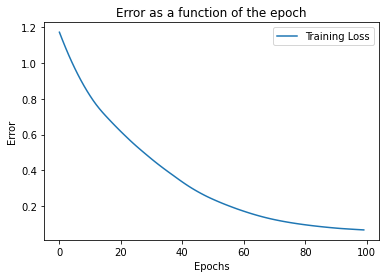

In [ ]:
# Access the loss_curve_ attribute to retrieve the loss at each iteration
loss_values = nn1.loss_curve_

# Plot the loss function over epochs
import matplotlib.pyplot as plt
plt.plot(loss_values, label='Training Loss')
plt.title('Error as a function of the epoch')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()

In [ ]:
"""
Example of how to plot a loss curve if we are using one of the from scratch neural networks

# The error values are calculated and accumulated in the backprop function (BP_GD) and returned to the main program
problem = 'classification'

Er = []

if problem == 'regression':
    # For each epoch within the gradient descent back prop function (BP_GD)
    rmse = np.sqrt(sse/self.TrainData.shape[0]*self.Top[2])
    Er = np.append(Er, rmse) # The error for this epoch added to the error list

if problem == 'classification':
    acc = ........
    Er = np.append(Er, acc) # The error for this epoch added to the error list



# We we call the BP_GP function we return the value Er within the function into the parameter erEP
# erEP is a list that contains the rmse values for each epoch as calcualted within the backprop gradient descent function (BP_GD)
erEp,  trainMSE[run] , trainPerf[run] , Epochs[run] = fnn.BP_GD(trainTolerance) 

# We can then plot the error values for each epoch
"""

IndentationError: unexpected indent (915319529.py, line 4)

In [ ]:
# For tensor flow

"""

# Fit model : This runs the models and stores the results we want to plot in the history variable
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)

# Evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0) # The two method outputs are loss and accuracy (if we define a metric as other than accuracy, then metric fills the second variable)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# Plot history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.savefig('nodp.png')

"""